<a href="https://colab.research.google.com/github/kim-slava/lab_sii/blob/main/sii_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

In [2]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

# позволяет отображать графики прямо в ноутбуке
%matplotlib inline

In [3]:
training_data = pd.read_csv('train_d.csv')
training_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
training_data.shape

(599, 9)

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               599 non-null    int64  
 1   Glucose                   599 non-null    int64  
 2   BloodPressure             599 non-null    int64  
 3   SkinThickness             599 non-null    int64  
 4   Insulin                   599 non-null    int64  
 5   BMI                       599 non-null    float64
 6   DiabetesPedigreeFunction  599 non-null    float64
 7   Age                       599 non-null    int64  
 8   Outcome                   599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


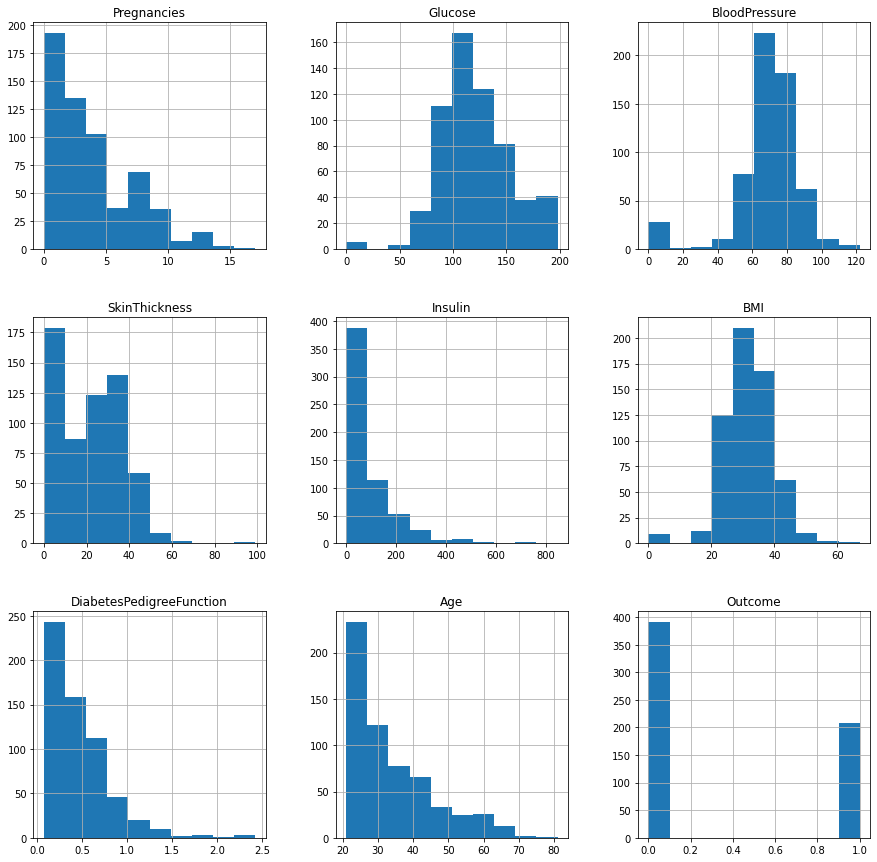

In [6]:
training_data.hist(figsize=(15, 15));


In [8]:
training_values = training_data['Age']

In [9]:
training_points = training_data.drop('Age', axis=1)


In [10]:
training_points.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [11]:
training_points.shape


(599, 8)

In [12]:

from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression() # создаем модель
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

In [13]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [14]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=123)

In [16]:

test_data = pd.read_csv('test_d.csv')
test_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,108,88,19,0,27.1,0.400,24,0
1,6,96,0,0,0,23.7,0.190,28,0
2,1,124,74,36,0,27.8,0.100,30,0
3,7,150,78,29,126,35.2,0.692,54,1
4,4,183,0,0,0,28.4,0.212,36,1
5,1,124,60,32,0,35.8,0.514,21,0
6,1,181,78,42,293,40.0,1.258,22,1
7,1,92,62,25,41,19.5,0.482,25,0
8,0,152,82,39,272,41.5,0.270,27,0
9,1,111,62,13,182,24.0,0.138,23,0


In [17]:
test_data.shape

(168, 9)

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               168 non-null    int64  
 1   Glucose                   168 non-null    int64  
 2   BloodPressure             168 non-null    int64  
 3   SkinThickness             168 non-null    int64  
 4   Insulin                   168 non-null    int64  
 5   BMI                       168 non-null    float64
 6   DiabetesPedigreeFunction  168 non-null    float64
 7   Age                       168 non-null    int64  
 8   Outcome                   168 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.9 KB


In [19]:
test_values = test_data['Age']

In [20]:
test_points = test_data.drop('Age', axis=1)

In [21]:
list(test_points)==list(training_points)

True

In [22]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [23]:
test_predictions_random_forest = random_forest_model.predict(test_points)

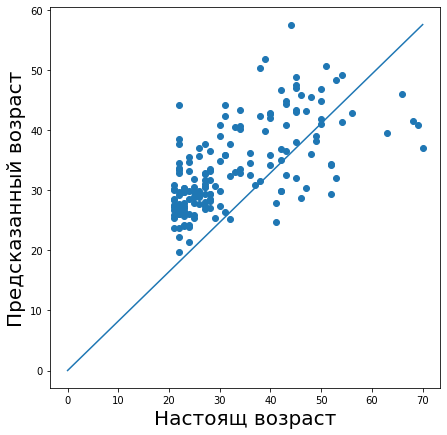

In [25]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящ возраст', fontsize=20)
plt.ylabel('Предсказанный возраст', fontsize=20);

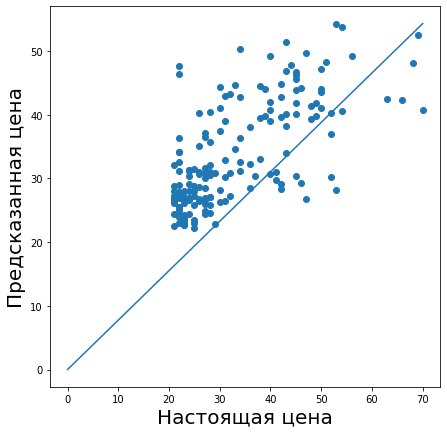

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящ возраст', fontsize=20)
plt.ylabel('Предсказанный возраст', fontsize=20);

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
r2_score_linear_model = r2_score(test_values, test_predictions_linear)

In [29]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(test_values, test_predictions_random_forest)

In [30]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear), 
        mean_squared_error(test_values, test_predictions_linear)**0.5, r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest), 
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, r2_score_random_forest_model))

MAE:    6.72, RMSE:    8.92, R2:    0.40 for linear model
MAE:    6.17, RMSE:    8.45,  R2:    0.46 for random forest model
